We will plot the three longest whiskers on each side, one side after each other

In [1]:
import os
import cv2
import tables
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Navigate to the directory where the video and tracking data is stored
data_dir="E:/test/whisker_tracking"
video_name="whiskers.mp4"
video_file=os.path.join(data_dir,video_name)
os.chdir(data_dir)

In [3]:
# Open the HDF5 file and get the pixel data
face_side = 'left'
h5file = tables.open_file(f'{os.path.basename(video_name).split(".")[0]}_{face_side}.hdf5', mode='r')
pixels_x = h5file.get_node('/pixels_x')
pixels_y = h5file.get_node('/pixels_y')

# Get the summary data
summary = h5file.get_node('/summary')

# Get unique whisker IDs
whisker_ids = np.unique(summary[:]['wid'])

# Create set of colors for up to 20 whiskers, starting with red, green, blue
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255),
            (0,255,255), (128,0,0), (0,128,0), (0,0,128), (128,128,0),
            (128,0,128), (0,128,128), (64,0,0), (0,64,0), (0,0,64),
            (64,64,0), (64,0,64), (0,64,64), (192,0,0), (0,192,0)]

In [4]:
# If using split data (left or right whiskers), open the corresponding whiskerpad_{side}.json file
with open(f'whiskerpad_{os.path.basename(video_name).split(".")[0]}.json', 'r') as f:
    whiskerpad_params = json.load(f)

# Enumerate whiskerpads field and find the "Location" value for the whiskerpad that has "FaceSide" value of face_side
for i, whiskerpad in enumerate(whiskerpad_params['whiskerpads']):
    if whiskerpad['FaceSide'].lower() == face_side:
        whiskerpad_location = whiskerpad['Location']
        image_coord = whiskerpad['ImageCoordinates']
        break

# Convert whiskerpad_location to a NumPy array
whiskerpad_location = np.array(whiskerpad_location)

# Get the table index for the first frame, with fid = 0 
first_frame_idx = np.where(summary[:]['fid'] == 0)[0]

# Get the index for the three longest whiskers in the first frame
longest_whiskers = np.argsort(summary[first_frame_idx]['length'])[-3:]

# # Sort them by the face_x coordinate
longest_whiskers = longest_whiskers[np.argsort(summary[first_frame_idx]['follicle_y'][longest_whiskers])]

In [5]:
longest_whiskers

array([0, 1, 2], dtype=int64)

In [6]:
# Read in a frame of the video
frame_num = 0
cap = cv2.VideoCapture('whiskers.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
ret, frame = cap.read()

In [7]:
first_frame_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [ ]:
# # Print first values of pixels_x and pixels_y for the first frame, for  all whiskers
# print("Pixel_x and Pixels_y values for first frame, for all whiskers:")
# for whisker_id in first_frame_idx:
#     print(pixels_x[whisker_id][0], pixels_y[whisker_id][0])

# # Print the follicle_x and follicle_y values for the first frame, for all whiskers
# print("Follicle_x and Follicle_y values for first frame, for all whiskers:")
# for whisker_id in first_frame_idx:
#     print(summary[whisker_id]['follicle_x'], summary[whisker_id]['follicle_y'])

In [9]:
# Using index of three longest whiskers, plot the whiskers on the frame
for i, whisker_id in enumerate(longest_whiskers):
    color_index = i % len(colors)
    color = colors[color_index]
    print(f'Whisker ID: {whisker_id}, color: {color}')

    print(pixels_x[whisker_id][0], pixels_y[whisker_id][0])
    for j in range(pixels_x[whisker_id].shape[0]):
        # add the image_coord first two values
        x = int(pixels_x[whisker_id][j]) + image_coord[0]
        y = int(pixels_y[whisker_id][j]) + image_coord[1]
        cv2.circle(frame, (x,y), 2, color, -1)

Whisker ID: 0, color: (255, 0, 0)
127.94381 223.25346
Whisker ID: 1, color: (0, 255, 0)
115.23104 244.50453
Whisker ID: 2, color: (0, 0, 255)
100.219406 252.57852


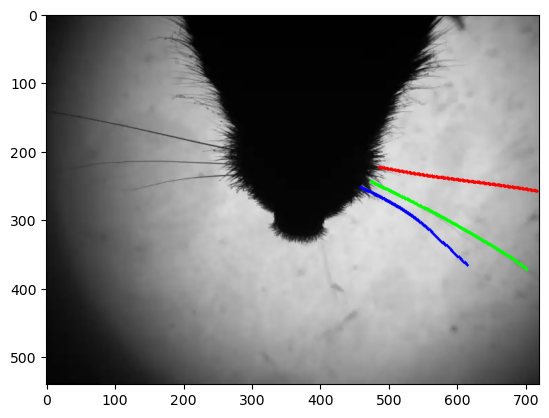

In [10]:
# Plot the frame below the cell in the notebook
plt.imshow(frame)

In [11]:
# Now the same for the right side:
face_side = 'right'
h5file = tables.open_file(f'{os.path.basename(video_name).split(".")[0]}_{face_side}.hdf5', mode='r')
pixels_x = h5file.get_node('/pixels_x')
pixels_y = h5file.get_node('/pixels_y')

# Get the summary data
summary = h5file.get_node('/summary')

# Get unique whisker IDs
whisker_ids = np.unique(summary[:]['wid'])

# Create a different set of colors for up to 20 whiskers
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255),
            (0,255,255), (128,0,0), (0,128,0), (0,0,128), (128,128,0),
            (128,0,128), (0,128,128), (64,0,0), (0,64,0), (0,0,64),
            (64,64,0), (64,0,64), (0,64,64), (192,0,0), (0,192,0)]


In [12]:
# Enumerate whiskerpads field and find the "Location" value for the whiskerpad that has "FaceSide" value of face_side
for i, whiskerpad in enumerate(whiskerpad_params['whiskerpads']):
    if whiskerpad['FaceSide'].lower() == face_side:
        whiskerpad_location = whiskerpad['Location']
        image_coord = whiskerpad['ImageCoordinates']
        break

# Convert whiskerpad_location to a NumPy array
whiskerpad_location = np.array(whiskerpad_location)

# Get the table index for the first frame, with fid = 0 
first_frame_idx = np.where(summary[:]['fid'] == 0)[0]

# Get the index for the three longest whiskers in the first frame
longest_whiskers = np.argsort(summary[first_frame_idx]['length'])[-3:]

# Sort them by the face_x coordinate
longest_whiskers = longest_whiskers[np.argsort(summary[first_frame_idx]['follicle_y'][longest_whiskers])]

In [13]:
longest_whiskers

array([0, 2, 1], dtype=int64)

In [14]:
# Using index of three longest whiskers, plot the whiskers on the frame
for i, whisker_id in enumerate(longest_whiskers):
    color_index = i % len(colors)
    color = colors[color_index]
    for i in range(pixels_x[whisker_id].shape[0]):
        # add the image_coord first two values
        x = int(pixels_x[whisker_id][i]) + image_coord[0]
        y = int(pixels_y[whisker_id][i]) + image_coord[1]
        cv2.circle(frame, (x,y), 2, color, -1)

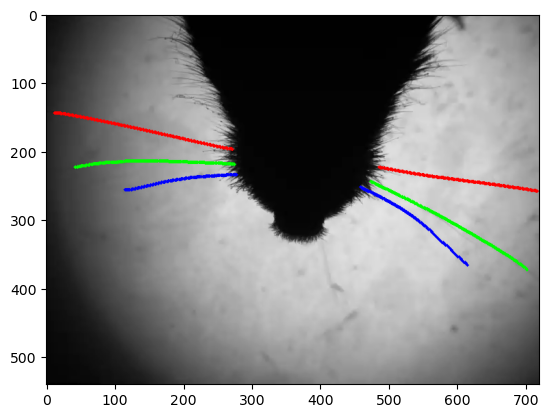

In [15]:
# Plot the frame below the cell in the notebook
plt.imshow(frame)

In [16]:
# Release the resources
cap.release()
h5file.close()